In [1]:
import numpy as np
import torch

In [10]:
import os, os.path

folder = 'install/bin/GPUExample2'
files = os.listdir (folder)
files[-5:]

['line95.txt', 'line96.txt', 'line97.txt', 'line98.txt', 'line99.txt']

In [39]:
data = []
for file in files:
    with open (os.path.join (folder, file), 'rt') as f:
        iq_line = []
        for line in f:
            value = np.complex (*[float (x) for x in line.strip ().split (',')])
            iq_line.append (value)
        data.append (np.array (iq_line))
data = np.array (data)
print (data, data.dtype, data.shape)

[[-1.42203e-06+5.93023e-06j -7.15253e-07+6.55651e-06j
   1.49663e-06+6.40119e-06j ... -2.39126e-07-1.07288e-05j
  -1.90420e-06-1.05006e-05j -4.39604e-06-1.04481e-05j]
 [-5.93086e-07+9.07890e-06j  2.98027e-07+8.82149e-06j
   1.34269e-06+8.47740e-06j ... -4.77686e-07-1.28746e-05j
  -2.98821e-06-1.27730e-05j -5.31221e-06-1.09535e-05j]
 [-2.30928e-06+2.10577e-05j -1.19202e-07+2.06828e-05j
   4.35113e-06+2.06136e-05j ... -4.78519e-07-2.55108e-05j
  -5.11838e-06-2.62251e-05j -6.74055e-06-2.53854e-05j]
 ...
 [ 2.39394e-06-1.66389e-05j -4.76843e-07-1.56164e-05j
  -3.25837e-06-1.63813e-05j ... -2.36808e-07+2.44379e-05j
   3.82219e-06+2.41372e-05j  7.28518e-06+2.32031e-05j]
 [ 2.64807e-06-1.67193e-05j -6.09426e-12-1.62721e-05j
  -3.06311e-06-1.62915e-05j ... -1.90567e-06+2.55109e-05j
   2.42792e-06+2.44786e-05j  7.51194e-06+2.31294e-05j]
 [ 3.77649e-06-1.77475e-05j -7.41133e-12-1.97887e-05j
  -3.76718e-06-1.76887e-05j ...  4.78487e-07+2.50339e-05j
   5.68742e-06+2.37211e-05j  8.01582e-06+2.62246

In [167]:
import matplotlib.pyplot as plt
import numpy as np

def visualize (iq_lines, title='', equalize=False, min_dB=None, save_path=None, figsize=(12, 6), aspect_ratio='auto'):
    
    num_samples, num_lines = iq_lines.shape
    center_magnitude = abs (iq_lines[:, num_lines//2].real)
    # Detect envelope
    data = abs (iq_lines)
    # Full-scale contrast stretch into range [0, 1]
    low, high = data.min (), data.max ()
    data = (data - low) / (high - low)
    # Histogram equalize
    if equalize:
        hist, bins = np.histogram (abs (data), bins=256)
        cdf = np.cumsum (hist)
        cdf = cdf/cdf[-1]
        data = np.interp (data, bins[:-1], cdf)
    # Log compress into range [min_dB, 0] dB
    if min_dB is not None:
        data = 10 * np.log10(data + 10**(min_dB/10))

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    ax = axes[0]
    plt.sca (ax)
    plt.plot(center_magnitude, color=(153/255,102/255,204/255))
    plt.xlabel ('Depth', fontsize=14, labelpad=15)
    plt.ylabel ('Amplitude', fontsize=14, labelpad=15)
    plt.yticks ([])
    plt.grid ()
    plt.title ('Center RF-Line Magnitude', fontsize=16, pad=15)

    for side in ['top', 'right', 'left']:
        ax.spines[side].set_visible (False)

    ax = axes[1]
    plt.sca (ax)
    image = plt.imshow (data, cmap='gray', interpolation='nearest')
    ax.set_aspect (aspect_ratio)
    plt.xlabel ('Width', fontsize=14, labelpad=15)
    plt.ylabel ('Depth', fontsize=14, labelpad=15)
    if title:
        plt.title (title, fontsize=16, pad=15)
    plt.grid ()
    
    plt.tick_params (axis='both', which='both', bottom=True, top=False,
                    labelbottom=True, left=True, right=False, labelleft=True)
    for side in ['top', 'right', 'bottom', 'left']:
        ax.spines[side].set_visible (False)
    for side in ['bottom', 'left']:
        ax.spines[side].set_position(('outward', 1))
    
    if min_dB is not None:
        cbar = fig.colorbar (image)
        cbar.set_label ('(dB)', fontsize=12)

    if save_path:
        plt.savefig(save_path)
        print('Image written to disk at:\n{}'.format (save_path))

    plt.show()

Image written to disk at:
figures/gpu_example2.output.png


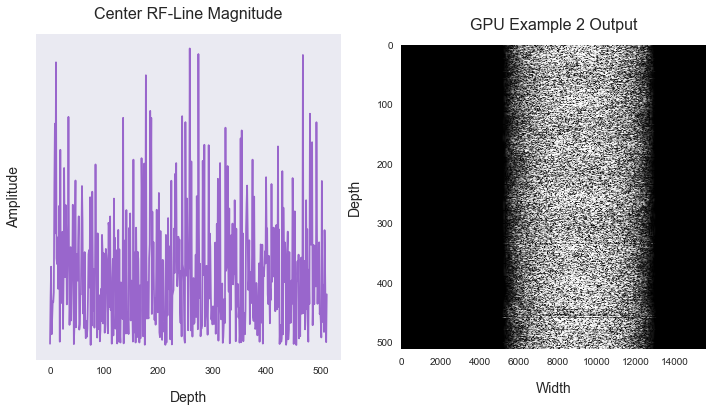

In [163]:
ratio = data.shape[1]/data.shape[0]
visualize (data, 'GPU Example 2 Output', save_path='figures/gpu_example2.output.png', aspect_ratio=ratio, equalize=1)